In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords #text preprocessing
from nltk.tokenize import word_tokenize, sent_tokenize

In [37]:
import string
string.punctuation
import nltk
nltk.download ("wordnet")
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df=pd.read_csv("/content/fake_or_real_news.csv")

In [6]:
data=df.copy()
df1=df.copy()

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df1=df1.drop(['Unnamed: 0',"title"],axis=1)

In [8]:
df1.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [9]:
df1.shape

(6335, 2)

In [10]:
df1.isnull().sum()

,0
text,0
label,0


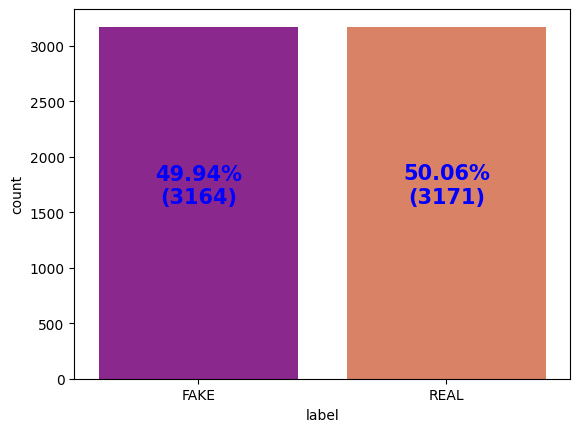

In [18]:
sns.countplot(data=df1, x="label", palette="plasma")
label_counts = df1['label'].value_counts()
total_count = len(df1)
for label, count in label_counts.items():
    percentage = round(count / total_count * 100, 2)
    plt.text(label, count / 2, f"{percentage}%\n({count})", ha="center", color="blue", weight="bold", size=15)

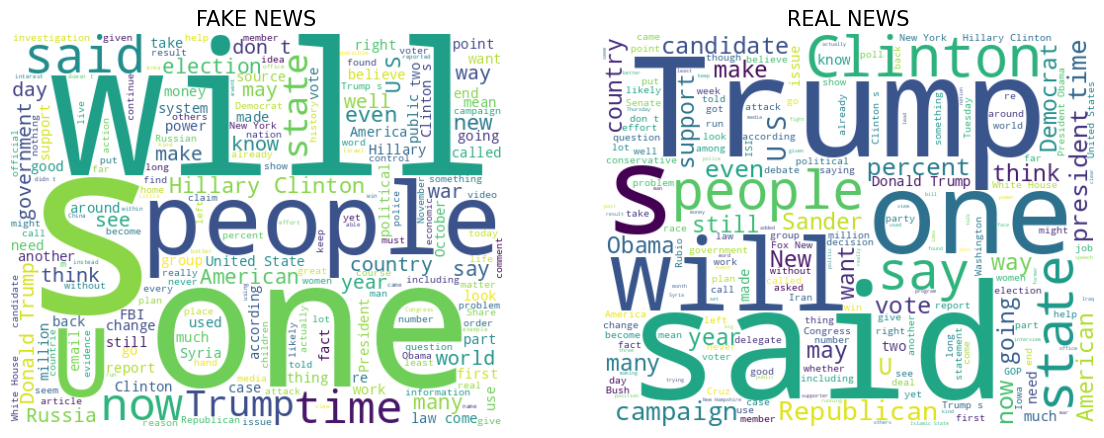

In [23]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
fake_text=" ".join(df1[df1["label"]=="FAKE"]["text"])
wordcloud=WordCloud(width=500,height=400,background_color="white").generate(fake_text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("FAKE NEWS",size=15)
plt.axis("off")
plt.subplot(1,2,2)
real_text=" ".join(df1[df1["label"]=="REAL"]["text"])
wordcloud=WordCloud(width=500,height=400,background_color="white").generate(real_text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("REAL NEWS",size=15)
plt.axis("off")
plt.show()

**CREATE SOME COLUMN BASED ON TEXT COLUMN**

In [26]:
df1["Lenth"]=df1["text"].str.len()
df1["num_words"]=df1["text"].apply(lambda x:len(word_tokenize(x)))
df1["num_sentences"]=df1["text"].apply(lambda x:len(sent_tokenize(x)))
df1.head()

,text,label,Lenth,num_words,num_sentences
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1473,87
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,517,26
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,484,16
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,498,17
4,It's primary day in New York and front-runners...,REAL,1840,376,21


In [27]:
avg_length_fake=df1[df1["label"]=="FAKE"]["Lenth"].mean()
avg_length_real=df1[df1["label"]=="REAL"]["Lenth"].mean()
print("Average length of fake news:",avg_length_fake)
print("Average length of real news:",avg_length_real)

Average length of fake news: 4121.046460176991
Average length of real news: 5292.160201829076


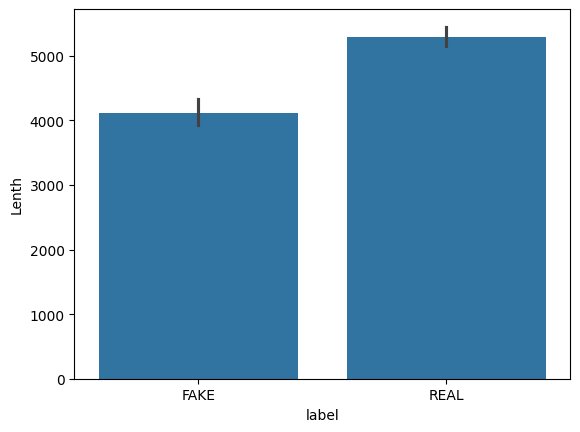

In [30]:
sns.barplot(x="label",y="Lenth",data=df1)
plt.show()

In [31]:
avg_word_fake=df1[df1["label"]=="FAKE"]["num_words"].mean()
avg_word_real=df1[df1["label"]=="REAL"]["num_words"].mean()
print("Average length of fake news:",avg_word_fake)
print("Average length of real news:",avg_word_real)

Average length of fake news: 784.3094184576486
Average length of real news: 1017.8978240302744


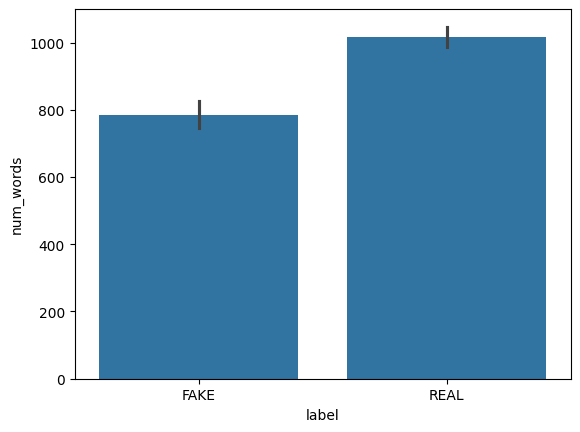

In [32]:
sns.barplot(x="label",y="num_words",data=df1)
plt.show()

In [34]:
avg_sentence_fake=df1[df1["label"]=="FAKE"]["num_sentences"].mean()
avg_sentence_real=df1[df1["label"]=="REAL"]["num_sentences"].mean()
print("Average length of fake news:",avg_sentence_fake)
print("Average length of real news:",avg_sentence_real)

Average length of fake news: 29.305309734513273
Average length of real news: 39.2560706401766


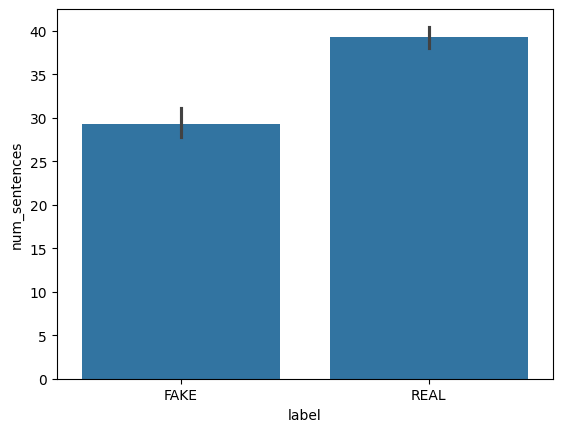

In [35]:
sns.barplot(x="label",y="num_sentences",data=df1)
plt.show()

**TEXT PREPROCESSING**

In [39]:
stopword=set(stopwords.words("english"))
lmt=WordNetLemmatizer()
text_column="text"
processted_text=[]
for text in df1[text_column]:
  text=text.translate(str.maketrans(" "," ",string.punctuation))
  words=text.lower().split()
  words=[word for word in words if word not in stopword]
  lematized_words=" ".join([lmt.lemmatize(word) for word in words])
  processted_text.append(lematized_words)
df1["processed_text"]=processted_text

In [40]:
df1.head()

,text,label,Lenth,num_words,num_sentences,processed_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,1473,87,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,517,26,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,484,16,u secretary state john f kerry said monday sto...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,498,17,— kaydee king kaydeeking november 9 2016 lesso...
4,It's primary day in New York and front-runners...,REAL,1840,376,21,primary day new york frontrunners hillary clin...


In [41]:
X=df1["processed_text"]
y=df1["label"]
#need vectorize
vec=TfidfVectorizer()
X=vec.fit_transform(X)
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [52]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'FAKE': 0, 'REAL': 1}


In [42]:
X.shape

(6335, 78620)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay,roc_curve,auc

In [58]:
bernoli=BernoulliNB()
multinomial=MultinomialNB()
rfc=RandomForestClassifier()

In [59]:
#Create a function for apply model
def apply_model(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("Accuracy Score:",accuracy_score(y_test,y_pred))
  print("Classification Report:\n",classification_report(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_pred)
  print("AUC Score:",auc(fpr,tpr))
  cost_function=np.sum(np.abs(y_test-y_pred))
  print("Cost Function:",cost_function)
  RocCurveDisplay.from_estimator(model,X_test,y_test)
  plt.show()

Accuracy Score: 0.8208366219415943
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       628
           1       0.86      0.77      0.81       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.83      0.82      0.82      1267

Confusion Matrix:
 [[550  78]
 [149 490]]
AUC Score: 0.8213096697666538
Cost Function: 227


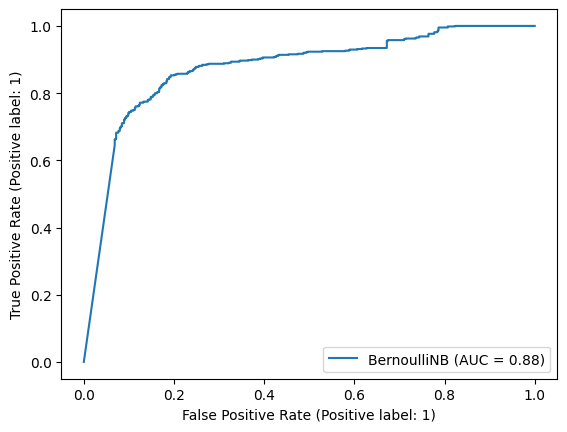

In [55]:
apply_model(bernoli,X_train,X_test,y_train,y_test)

Accuracy Score: 0.8271507498026835
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.66      0.79       628
           1       0.75      0.99      0.85       639

    accuracy                           0.83      1267
   macro avg       0.87      0.83      0.82      1267
weighted avg       0.87      0.83      0.82      1267

Confusion Matrix:
 [[416 212]
 [  7 632]]
AUC Score: 0.8257328827885929
Cost Function: 219


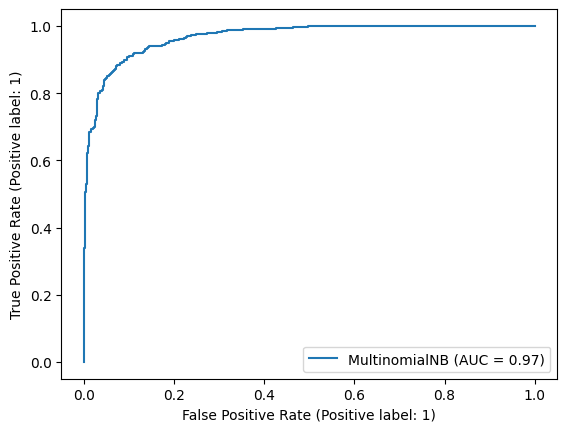

In [56]:
apply_model(multinomial,X_train,X_test,y_train,y_test)

Accuracy Score: 0.9139700078926598
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       628
           1       0.91      0.92      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:
 [[573  55]
 [ 54 585]]
AUC Score: 0.913956669956042
Cost Function: 109


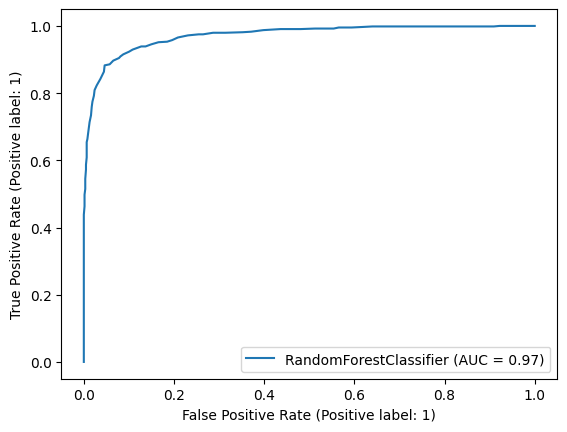

In [60]:
apply_model(rfc,X_train,X_test,y_train,y_test)

In [63]:
#Add sum matrics for selecting better model
from sklearn.metrics import balanced_accuracy_score, log_loss, matthews_corrcoef, cohen_kappa_score
#Create function
def updated_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Calculate probabilities if available
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = y_pred  # Fallback to predictions if no probabilities or decision function available

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    print("AUC Score:", auc(fpr, tpr))

    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print("Balanced Accuracy:", balanced_acc)

    # Log Loss
    if hasattr(model, "predict_proba") or hasattr(model, "decision_function"):
        logloss = log_loss(y_test, y_proba)
        print("Log Loss:", logloss)

    # Matthews Correlation Coefficient
    mcc = matthews_corrcoef(y_test, y_pred)
    print("Matthews Correlation Coefficient (MCC):", mcc)

    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Cohen's Kappa:", kappa)

    # Optional: Remove this based on your specific need
    cost_function = np.sum(np.abs(y_test - y_pred))
    print("Cost Function:", cost_function)

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()


Accuracy Score: 0.8271507498026835
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.66      0.79       628
           1       0.75      0.99      0.85       639

    accuracy                           0.83      1267
   macro avg       0.87      0.83      0.82      1267
weighted avg       0.87      0.83      0.82      1267

Confusion Matrix:
 [[416 212]
 [  7 632]]
AUC Score: 0.9680556801531054
Specificity: 0.6624203821656051
Balanced Accuracy: 0.8257328827885928
Log Loss: 0.37168896385041766
Matthews Correlation Coefficient (MCC): 0.6906856650921205
Cohen's Kappa: 0.6533013298281082
Cost Function: 219


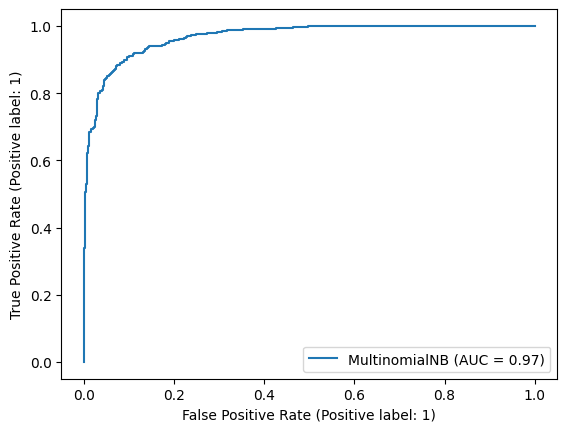

In [64]:
updated_model(multinomial, X_train, X_test, y_train, y_test)

Accuracy Score: 0.8208366219415943
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       628
           1       0.86      0.77      0.81       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.83      0.82      0.82      1267

Confusion Matrix:
 [[550  78]
 [149 490]]
AUC Score: 0.8754298615472025
Specificity: 0.8757961783439491
Balanced Accuracy: 0.8213096697666538
Log Loss: 4.682495058088592
Matthews Correlation Coefficient (MCC): 0.6460576697979016
Cohen's Kappa: 0.6419946101709684
Cost Function: 227


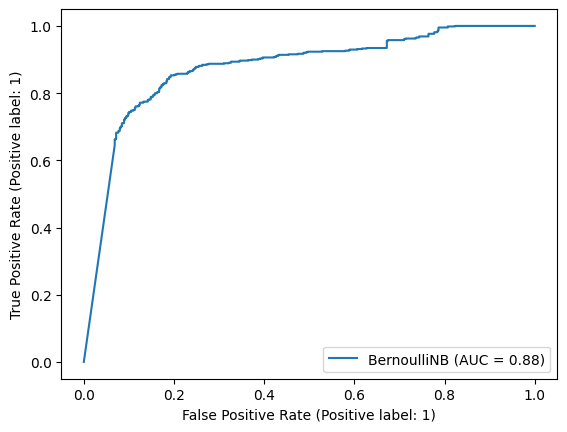

In [65]:
updated_model(bernoli, X_train, X_test, y_train, y_test)

Accuracy Score: 0.909234411996843
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       628
           1       0.91      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:
 [[571  57]
 [ 58 581]]
AUC Score: 0.9686562403436899
Specificity: 0.9092356687898089
Balanced Accuracy: 0.9092344228143098
Log Loss: 0.35998207523924886
Matthews Correlation Coefficient (MCC): 0.8184586478979264
Cohen's Kappa: 0.8184576280689513
Cost Function: 115


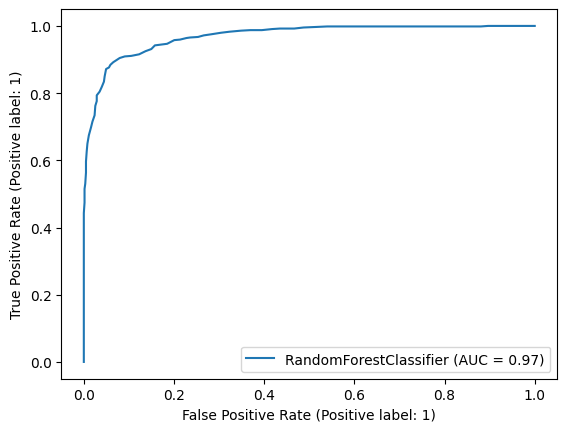

In [66]:
updated_model(rfc, X_train, X_test, y_train, y_test)